# Practical session on linear programming

## Problem statement

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

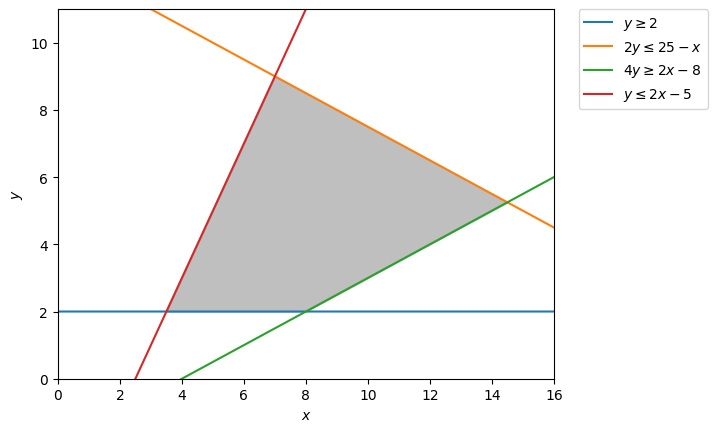

In [2]:
# Construct lines
# x > 0
x = np.linspace(0, 20, 2000)
# y >= 2
y1 = (x*0) + 2
# 2y <= 25 - x
y2 = (25-x)/2.0
# 4y >= 2x - 8 
y3 = (2*x-8)/4.0
# y <= 2x - 5 
y4 = 2 * x -5

# Make plot
plt.plot(x, y1, label=r'$y\geq2$')
plt.plot(x, y2, label=r'$2y\leq25-x$')
plt.plot(x, y3, label=r'$4y\geq 2x - 8$')
plt.plot(x, y4, label=r'$y\leq 2x-5$')
plt.xlim((0, 16))
plt.ylim((0, 11))
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')

# Fill feasible region
y5 = np.minimum(y2, y4)
y6 = np.maximum(y1, y3)
plt.fill_between(x, y5, y6, where=y5>y6, color='grey', alpha=0.5)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

## Use pulp library to compute solution

In [3]:
# import pulp
!pip install pulp
import pulp

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.7/17.7 MB 3.0 MB/s eta 0:00:0000:0100:01


In [4]:
# declare the problem to solve
my_lp_problem = pulp.LpProblem("My-LP-Problem", pulp.LpMaximize)

In [6]:
# declare the variables
x = pulp.LpVariable('x', lowBound=0, cat='Continuous')
y = pulp.LpVariable('y', lowBound=0, cat='Continuous')

In [7]:
# Objective function
my_lp_problem += 4 * x + 3 * y, "Z"

# Constraints
my_lp_problem += y >= 2
my_lp_problem += 2 * y <= 25 - x
my_lp_problem += 4 * y >= 2 * x - 8
my_lp_problem +=  y <= 2 * x - 5

In [8]:
# inspect the problem
my_lp_problem

My-LP-Problem:
MAXIMIZE
4*x + 3*y + 0
SUBJECT TO
_C1: y >= 2

_C2: x + 2 y <= 25

_C3: - 2 x + 4 y >= -8

_C4: - 2 x + y <= -5

VARIABLES
x Continuous
y Continuous

In [9]:
# solve
my_lp_problem.solve()
pulp.LpStatus[my_lp_problem.status]

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /home/yasser/miniconda3/lib/python3.12/site-packages/pulp/solverdir/cbc/linux/64/cbc /tmp/01b351a70be644488d09941c38721c28-pulp.mps -max -timeMode elapsed -branch -printingOptions all -solution /tmp/01b351a70be644488d09941c38721c28-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 9 COLUMNS
At line 19 RHS
At line 24 BOUNDS
At line 25 ENDATA
Problem MODEL has 4 rows, 2 columns and 7 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 3 (-1) rows, 2 (0) columns and 6 (-1) elements
0  Obj 19.599999 Primal inf 0.0999992 (1) Dual inf 6.999998 (2)
2  Obj 73.75
Optimal - objective value 73.75
After Postsolve, objective 73.75, infeasibilities - dual 0 (0), primal 0 (0)
Optimal objective 73.75 - 2 iterations time 0.002, Presolve 0.00
Option for printingOptions changed from normal to all
Total time (CPU seconds):       0.00   

'Optimal'

In [10]:
# display variables after optim
for variable in my_lp_problem.variables():
    print(variable.name, variable.varValue)

x 14.5
y 5.25


In [11]:
# print final value for the optimization
print(pulp.value(my_lp_problem.objective))

73.75


## Resource allocation problem

Consider the artisanal manufacturing of wood furniture, with the time of three workers, one salesman and one painter.
For each month, the sailsman can only work 15 days, each worker can work 21 days and the painter 19 days.
We can produce high quality chairs and tables that can be sold 30 euros per chair and 45 euros par table.
Time needed for workers: chair 5 days and table 6 days
Time needed for sailsman: chair 1.5 days and table 3 days
Time needed for painter: chair 3 days and table 4 days

Problem: maximise profit

Variables A: amount of chait and B: amount of tables produced in a month
Profit: 30A+45B
Subject to A>0, B>0
3A+4B < 19
5A+6B < 42
1.5A+3B <15

In [1]:
import pulp

In [2]:
# Instantiate our problem class
model = pulp.LpProblem("Profit", pulp.LpMaximize)

In [4]:
A = pulp.LpVariable('A', lowBound=0, cat='Integer')
B = pulp.LpVariable('B', lowBound=0, cat='Integer')

In [8]:
# Objective function
model += 30 * A + 45 * B, "P"

# Constraints
model += A >= 0
model += B >= 0
model += 3 * A + 4 * B <= 19
model += 5 * A + 6 * B <= 42
model += 1.5 * A + 3 * B <= 15

/home/yasser/miniconda3/lib/python3.12/site-packages/pulp/pulp.py:1650: UserWarning: Overwriting previously set objective.
  warnings.warn("Overwriting previously set objective.")


In [9]:
# Solve our problem
model.solve()
pulp.LpStatus[model.status]

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /home/yasser/miniconda3/lib/python3.12/site-packages/pulp/solverdir/cbc/linux/64/cbc /tmp/d35ede97f78b48dba74403275571d0fd-pulp.mps -max -timeMode elapsed -branch -printingOptions all -solution /tmp/d35ede97f78b48dba74403275571d0fd-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 15 COLUMNS
At line 38 RHS
At line 49 BOUNDS
At line 52 ENDATA
Problem MODEL has 10 rows, 2 columns and 16 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 213.75 - 0.00 seconds
Cgl0004I processed model has 3 rows, 2 columns (2 integer (0 of which binary)) and 6 elements
Cutoff increment increased from 1e-05 to 14.9999
Cbc0012I Integer solution of -210 found by DiveCoefficient after 0 iterations and 0 nodes (0.00 seconds)
Cbc0001I Search completed - best objective -210, took 0 iterations and 0 nodes (0.00 seconds)
Cbc

'Optimal'

In [10]:
# Print our decision variable values
print("Production of chair = {}".format(A.varValue))
print("Production of table = {}".format(B.varValue))

Production of chair = 1.0
Production of table = 4.0


## Optimal transport problem

Let us define an optimal transportation problem, from two factories named A and B, to 5 stores, as illustrated in the next figure

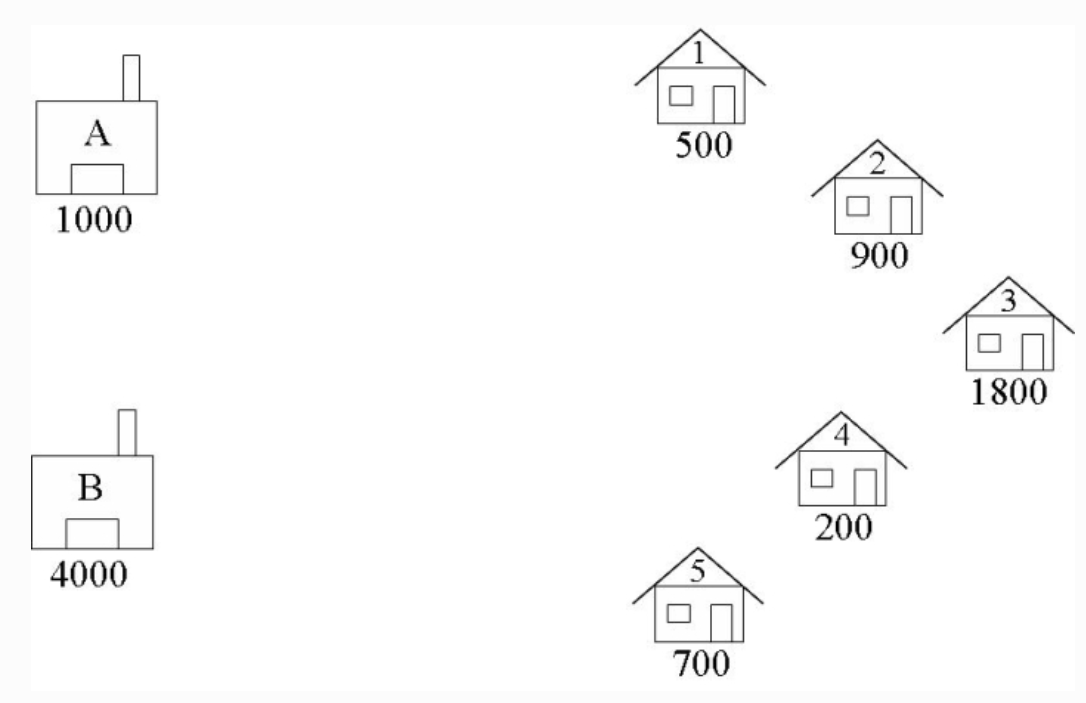

In [20]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(filename = "OptimalTransport.png", width=500, height=500)

The numbers in the figure indicate the maximum capacity of the factories, and the minimal demand of each store.
The optimal transport problem is defined as the optimal transport plan, minimizing displacement cost, so that each store is provided with enough goods to sell

### Decision variables

Let us define the variables to optimize.
If we denote $\mathcal{F}=\{A,B\}$ the set of factories and $\mathcal{S}=\{1,2,3,4,5\}$ the set of stores, let us define $x_{ij}$ the quantity of good that ships from factory $i$ to store $j$. It is obvious that $x_{ij}$ is a positive integer variable

### Displacement cost constraint

We shall further assume that there is a cost per item $c_{ij}$ to ship a good from factory $i$ to store $j$. The cost depends on many variables (distance, truck used, etc). For sake of simplicity, let us assume the following cost:




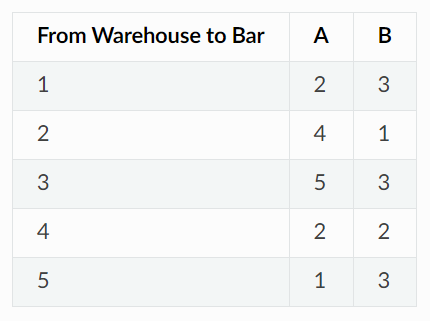

In [21]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(filename = "Cost.png", width=300, height=300)

### cost function

Given these notations, the proble can be formulated as the minimization of $$ \sum_{ij} c_{ij} x_{ij}$$

With the following constraints:

Factory capacity: $\sum_j x_{ij} \leq f_i$
Store demand: $\sum_i x_{ij} \geq s_j$

### Solve using pulp

In [1]:
# Import PuLP modeler functions
from pulp import *

In [2]:
# Creates a list of all the supply nodes
Factories = ["A", "B"]

# Creates a dictionary for the number of units of supply for each supply node
supply = {"A": 1000, "B": 4000}

# Creates a list of all demand nodes
Stores = ["1", "2", "3", "4", "5"]

# Creates a dictionary for the number of units of demand for each demand node
demand = {
    "1": 500,
    "2": 900,
    "3": 1800,
    "4": 200,
    "5": 700,
}

In [3]:
# Creates a list of costs of each transportation path
costs = [  # Stores
    # 1 2 3 4 5
    [2, 4, 5, 2, 1],  # A   Factories
    [3, 1, 3, 2, 3],  # B
]

# The cost data is made into a dictionary
costs = makeDict([Factories, Stores], costs, 0)
costs

defaultdict(<function pulp.utilities.__makeDict.<locals>.<lambda>()>,
            {'A': defaultdict(<function pulp.utilities.__makeDict.<locals>.<lambda>()>,
                         {'1': 2, '2': 4, '3': 5, '4': 2, '5': 1}),
             'B': defaultdict(<function pulp.utilities.__makeDict.<locals>.<lambda>()>,
                         {'1': 3, '2': 1, '3': 3, '4': 2, '5': 3})})

In [4]:
# Creates the 'prob' variable to contain the problem data
prob = LpProblem("OptimalTransportProblem", LpMinimize)

In [5]:
# Creates a list of tuples containing all the possible routes for transport
Routes = [(i, j) for i in Factories for j in Stores]

In [6]:
Routes

[('A', '1'),
 ('A', '2'),
 ('A', '3'),
 ('A', '4'),
 ('A', '5'),
 ('B', '1'),
 ('B', '2'),
 ('B', '3'),
 ('B', '4'),
 ('B', '5')]

In [7]:
# A dictionary called 'Vars' is created to contain the referenced variables(the routes)
vars = LpVariable.dicts("Route", (Factories, Stores), 0, None, LpInteger)

In [8]:
vars

{'A': {'1': Route_A_1,
  '2': Route_A_2,
  '3': Route_A_3,
  '4': Route_A_4,
  '5': Route_A_5},
 'B': {'1': Route_B_1,
  '2': Route_B_2,
  '3': Route_B_3,
  '4': Route_B_4,
  '5': Route_B_5}}

In [9]:
# The objective function is added to 'prob' first
prob += (
    lpSum([vars[i][j] * costs[i][j] for (i, j) in Routes]),
    "Sum_of_Transporting_Costs",
)
prob

OptimalTransportProblem:
MINIMIZE
2*Route_A_1 + 4*Route_A_2 + 5*Route_A_3 + 2*Route_A_4 + 1*Route_A_5 + 3*Route_B_1 + 1*Route_B_2 + 3*Route_B_3 + 2*Route_B_4 + 3*Route_B_5 + 0
VARIABLES
0 <= Route_A_1 Integer
0 <= Route_A_2 Integer
0 <= Route_A_3 Integer
0 <= Route_A_4 Integer
0 <= Route_A_5 Integer
0 <= Route_B_1 Integer
0 <= Route_B_2 Integer
0 <= Route_B_3 Integer
0 <= Route_B_4 Integer
0 <= Route_B_5 Integer

In [10]:
# The supply maximum constraints are added to prob for each supply node (warehouse)
for i in Factories:
    prob += (
        lpSum([vars[i][j] for j in Stores]) <= supply[i],
        f"Sum_of_Products_out_of_factory_{i}",
    )
# The demand minimum constraints are added to prob for each demand node (bar)
# YOUR CODE HERE

for i in Stores:
    prob += (
        lpSum([vars[j][i] for j in Factories]) >= demand[i],
        f"Sum_of_Products_to_store_{i}",
    )

In [29]:
# The problem data is written to an .lp file
prob.writeLP("OptimalTransport.lp")

# The problem is solved using PuLP's choice of Solver
prob.solve()

# The status of the solution is printed to the screen
print("Status:", LpStatus[prob.status])

# Each of the variables is printed with it's resolved optimum value
for v in prob.variables():
    print(v.name, "=", v.varValue)

# The optimised objective function value is printed to the screen
print("Total Cost of Transportation = ", value(prob.objective))

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /home/yasser/miniconda3/lib/python3.12/site-packages/pulp/solverdir/cbc/linux/64/cbc /tmp/958b1b6e23224b33b494a2a6e96b7574-pulp.mps -timeMode elapsed -branch -printingOptions all -solution /tmp/958b1b6e23224b33b494a2a6e96b7574-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 12 COLUMNS
At line 63 RHS
At line 71 BOUNDS
At line 82 ENDATA
Problem MODEL has 7 rows, 10 columns and 20 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 8600 - 0.00 seconds
Cgl0004I processed model has 7 rows, 10 columns (10 integer (0 of which binary)) and 20 elements
Cutoff increment increased from 1e-05 to 0.9999
Cbc0012I Integer solution of 8600 found by DiveCoefficient after 0 iterations and 0 nodes (0.00 seconds)
Cbc0001I Search completed - best objective 8600, took 0 iterations and 0 nodes (0.00 seconds)
Cbc0035I